<a href="https://colab.research.google.com/github/marceloberber/chimera/blob/main/demonstracao_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto em Sistemas Inteligentes – UNINOVE**
## **Deadline 6** — Demonstração IA
## **Orientador:** Thiago Graziani Traue

---

# **Membros:**

##Dennis Marquez Mazuchi – **RA:** 3019106392

##Kleber Lucas Azevedo Santos – **RA:** 3019106509

##Marcelo de Oliveira Berber – **RA:** 3019103136

##Matheus Meneses de Melo – **RA:** 3019114335

##Paulo Tiago Andrade Pereira – **RA:** 3019112546

---
## **Curso:** *Ciência da Computação*
## **Turma:** *36 – 8º semestre*



In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definindo caminho do Drive (diretorio do Grupo 15 criado pelo professor)
drivepath='/content/drive/MyDrive/Projetos/4ª noite - T36/Grupos/Grupo 15/6-Demonstracao/data'

In [ ]:
# Importando bibliotecas — pandas, matplotlib e seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para Machine Learning — scikit-learn, xgboost e lightgbm
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import warnings 
import xgboost

In [ ]:
# Importando bibliotecas 'miscellaneous'
import os                           # S.O.
import re                           # RegEx
from datetime import datetime       # Datetime

In [ ]:
# Lendo o CSV
print(drivepath)
df = pd.read_csv(drivepath + '/dataframe.csv')

/content/drive/MyDrive/Projetos/4ª noite - T36/Grupos/Grupo 15/6-Demonstracao/data


---

***• Análise explanatória***

In [ ]:
# Informacoes sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
# Shape (linhas x colunas)
print('Shape do dataframe (linhas x colunas): ', df.shape)

Shape do dataframe (linhas x colunas):  (26955, 5)


In [ ]:
# Tipos de dados das colunas
df.dtypes

location    object
year         int64
category    object
rank         int64
query       object
dtype: object

In [ ]:
# Describe
df.describe()

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


In [ ]:
df.isna().sum()

location    0
year        0
category    0
rank        0
query       0
dtype: int64

In [ ]:
# Todas as colunas do dataframe
df.columns

Index(['location', 'year', 'category', 'rank', 'query'], dtype='object')

In [ ]:
# Primeiras 10 linhas do dataframe
display(df.head(10))

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
5,Global,2001,Men,1,Nostradamus
6,Global,2001,Men,2,Osama bin Laden
7,Global,2001,Men,3,Eminem
8,Global,2001,Men,4,Michael Jackson
9,Global,2001,Men,5,Howard Stern


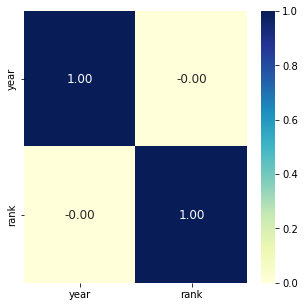

In [ ]:
# Correlação entre as variáveis 
corr = df.corr()
fig2, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size': 12}, fmt='.2f')

**Mineração de texto**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

**Machine Learning**
Treinamento do modelo

In [ ]:
X = df.drop(['year'], axis=1)
y = df['year']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=8)

In [ ]:
# Modelo XGBoost
xgb_model = XGBClassifier(
                          learning_rate=0.1,
                          n_estimators=100, 
                          silent=True,
                          objective='binary:logistic',
                          nthread=-1,
                          subsample=0.99, 
                          colsample_bytree=0.9, 
                          base_score=0.5, 
                          seed=142)

In [ ]:
print('AUC: '+str(metrics.roc_auc_score(y_test, prob)))
print('Accuracy : '+str(metrics.accuracy_score(y_test, pred)))
print('Recall : '+str(metrics.recall_score(y_test, pred)))
print('F1-Measure : '+str(metrics.f1_score(y_test, pred)))

NameError: ignored